In [1]:
"""
6/16/21

diego.aliaga at helsinki dot fi
"""

'\n6/16/21\n\ndiego.aliaga at helsinki dot fi\n'

interactive import

In [2]:
from IPython import get_ipython
_ipython = get_ipython()
if _ipython is not None:
    _magic = _ipython.magic
    _magic( 'load_ext autoreload' )
    _magic( 'autoreload 2' )

In [16]:
from npf_analyzer3 import *
import npf_analyzer3 as np3
import os
import xarray as xr
import AppearanceModeFit as Amf

'/Users/diego/npf-analyzer3/npf_analyzer3.py'

In [9]:
try:
    here_path = os.path.dirname(os.path.abspath(__file__))
except NameError:
    here_path = os.path.dirname(os.path.abspath(np3.__file__))

In [10]:
def open_darray( pp ):
    p = os.path.join( here_path , pp )
    ip_darray = np3.fu.open_sum(p)
    
    ip_darray = np3.fu.get_treated_da(ip_darray)
    
    
    da = np3.fu.set_secs_dim(ip_darray)
    da['tempK'] = xr.zeros_like(da['secs']) + 273
    da['presP'] = xr.zeros_like(da['secs']) + 532000
    
    return da

In [11]:
p1 = 'example_data/lev2_NAISp20180525np.sum'
da1 = open_darray(p1)

In [12]:
p2 = 'example_data/lev2_NAISp20180527np.sum'
da2 = open_darray(p2)

In [13]:
root_path = '/tmp/npf'
os.makedirs(root_path, exist_ok=True)

In [14]:
self = np3.GuiNpf()
self.set_ip_mode('particle')
self.set_ip_data_array( da1 )

In [15]:
self.plot_ip_size_dist()
self.set_project_path(root_path)

In [54]:
sa = self.get_smooth_ip_data()
pts = np3.get_roi_pol_coords(self.gui_ROI_a)
sd = self.project_path_appearance
amf = Amf.AppearanceModeFit(sa,pts,sd)

/Users/diego/miniconda3/envs/b37/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [59]:
f,ax = plt.subplots()
df = amf.df
df['Dp'] = 10**df.index
df.plot(x='x0',y='Dp', ax =ax )
df.plot(x='x0_',y='Dp',lw=0,marker='o', ax =ax )

NameError: name 'plt' is not defined

In [51]:
df.index()

TypeError: 'Float64Index' object is not callable

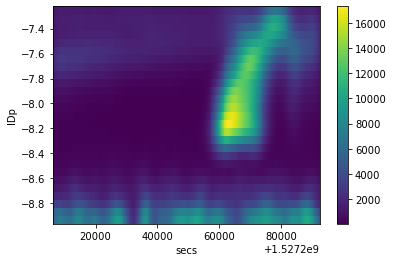

In [36]:
sa.plot()